In [1]:
resultsdf = read.csv('imageResults.csv',header=TRUE, sep=",")

In [2]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(sqldf)
library(data.table)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v stringr 1.4.0
v tidyr   1.0.2     v forcats 0.4.0
v readr   1.3.1     
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

In [3]:
#check resultsdf loaded in successfully
head(resultsdf,5)

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
100close,0.00,0,0,0,0,0,100,close,0,0,0,100
100close,0.05,0,0,0,0,0,100,close,0,0,0,100
100close,0.10,0,0,0,0,0,100,close,0,0,0,100
100close,0.15,0,0,0,0,0,100,close,0,0,0,100
100close,0.20,0,0,0,0,0,100,close,0,0,0,100


In [4]:
#split resultsdf into 2 sepereate dfs for future use - one with traffic lights, one with speed signs
trafficLightdf <- filter(resultsdf, resultsdf$Green.actual != 0 | resultsdf$Yellow.actual != 0 | resultsdf$Red.actual != 0)
speedSigndf <- filter(resultsdf, resultsdf$Speed.actual != "None")
head(trafficLightdf,5)
head(speedSigndf,5)

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
GreenClose,0.00,0,0,1,0,0,None,close,1,0,0,None
GreenClose,0.05,0,0,1,0,0,None,close,1,0,0,None
GreenClose,0.10,0,0,1,0,0,None,close,1,0,0,None
GreenClose,0.15,0,0,1,0,0,None,close,1,0,0,None
GreenClose,0.20,0,0,1,0,0,None,close,1,0,0,None


Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
100close,0.00,0,0,0,0,0,100,close,0,0,0,100
100close,0.05,0,0,0,0,0,100,close,0,0,0,100
100close,0.10,0,0,0,0,0,100,close,0,0,0,100
100close,0.15,0,0,0,0,0,100,close,0,0,0,100
100close,0.20,0,0,0,0,0,100,close,0,0,0,100


Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
100close,0.00,0,0,0,0,0,100,close,0,0,0,100
100close,0.05,0,0,0,0,0,100,close,0,0,0,100
100close,0.10,0,0,0,0,0,100,close,0,0,0,100
100close,0.15,0,0,0,0,0,100,close,0,0,0,100
100close,0.20,0,0,0,0,0,100,close,0,0,0,100


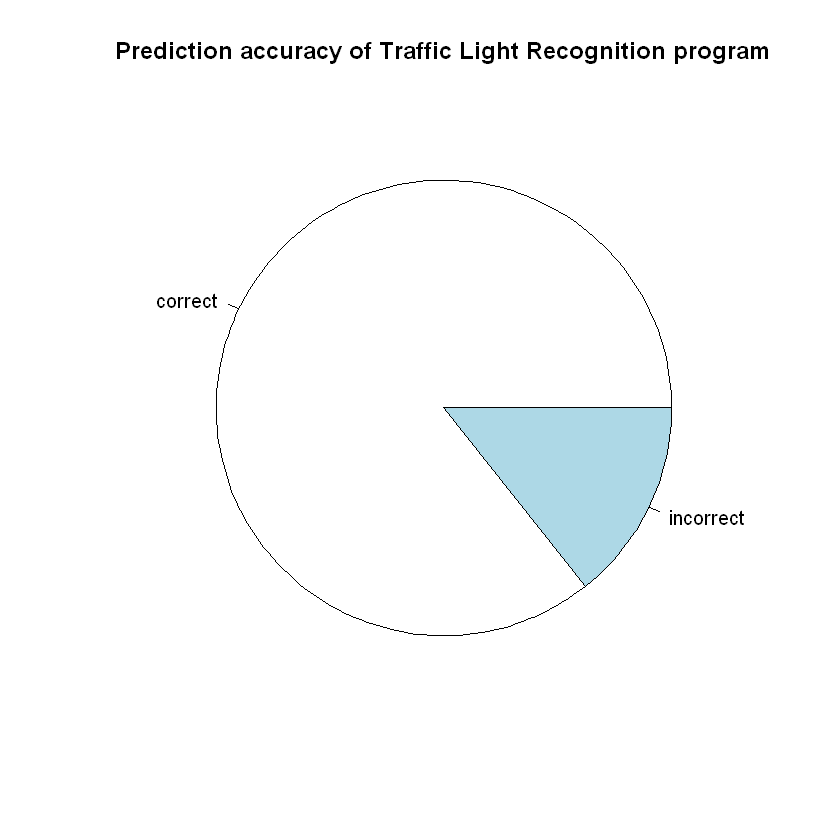

In [42]:
#show ratio of correct to incorrect traffic light detected
correctTrafficLights <- filter(resultsdf, resultsdf$Green.detected == resultsdf$Green.actual & resultsdf$Yellow.detected == resultsdf$Yellow.actual & resultsdf$Red.detected == resultsdf$Red.actual)
head(correctTrafficLights,5)

slices <- c(nrow(correctTrafficLights),
nrow(resultsdf)-nrow(correctTrafficLights))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of Traffic Light Recognition program")

In [6]:
nrow(correctTrafficLights)
nrow(resultsdf)

[1] 347

[1] 405

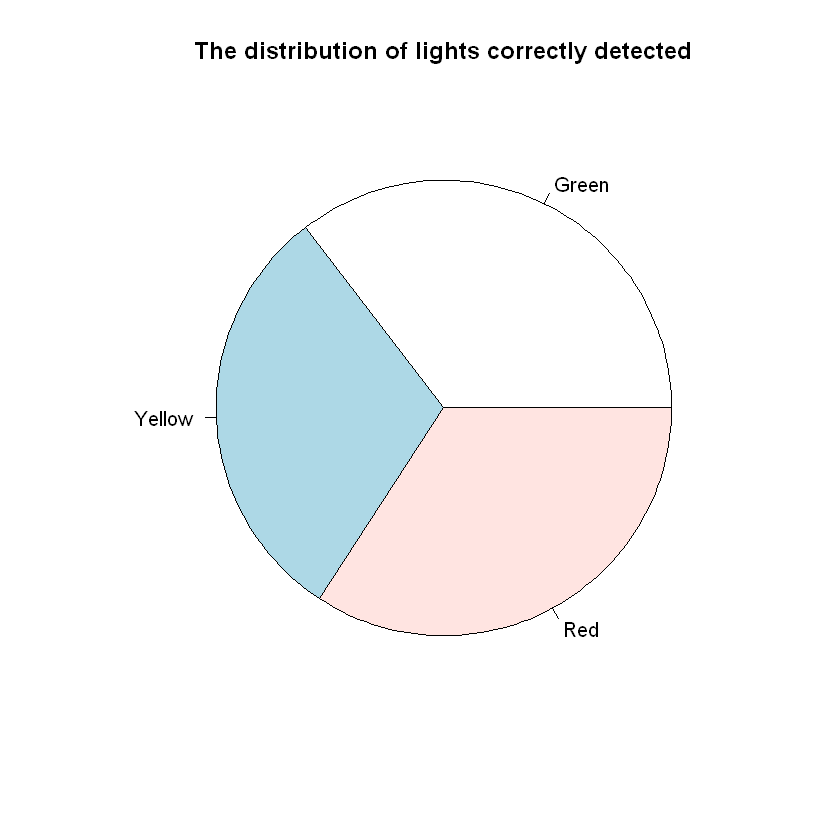

In [10]:
#show ratio of correct colours detected - no information gain therefore colour isn't an issue
correctGreenLights <- filter(resultsdf, resultsdf$Green.detected == resultsdf$Green.actual & resultsdf$Green.detected == 1)
correctYellowLights <- filter(resultsdf, resultsdf$Yellow.detected == resultsdf$Yellow.actual & resultsdf$Yellow.detected == 1)                          
correctRedLights <- filter(resultsdf, resultsdf$Red.detected == resultsdf$Red.actual & resultsdf$Red.detected == 1)

slices <- c(nrow(correctGreenLights),
nrow(correctYellowLights),
nrow(correctRedLights))
lbls <- c("Green", "Yellow","Red")
pie(slices,labels = lbls, 
     main="The distribution of lights correctly detected")

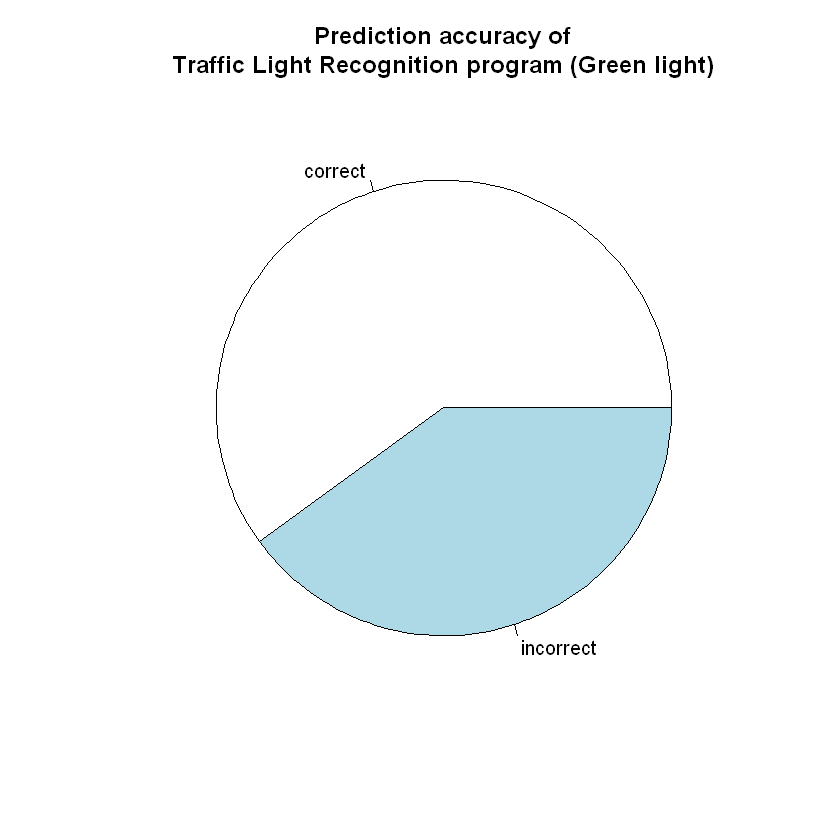

In [11]:
greenLightdf <- filter(trafficLightdf, trafficLightdf$Green.actual == 1)
correctGreenLight <- filter(greenLightdf, greenLightdf$Green.detected == greenLightdf$Green.actual & 
                            greenLightdf$Yellow.detected == greenLightdf$Yellow.actual &
                            greenLightdf$Red.detected == greenLightdf$Red.actual)
slices <- c(nrow(correctGreenLight),
nrow(greenLightdf)-nrow(correctGreenLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Green light)")

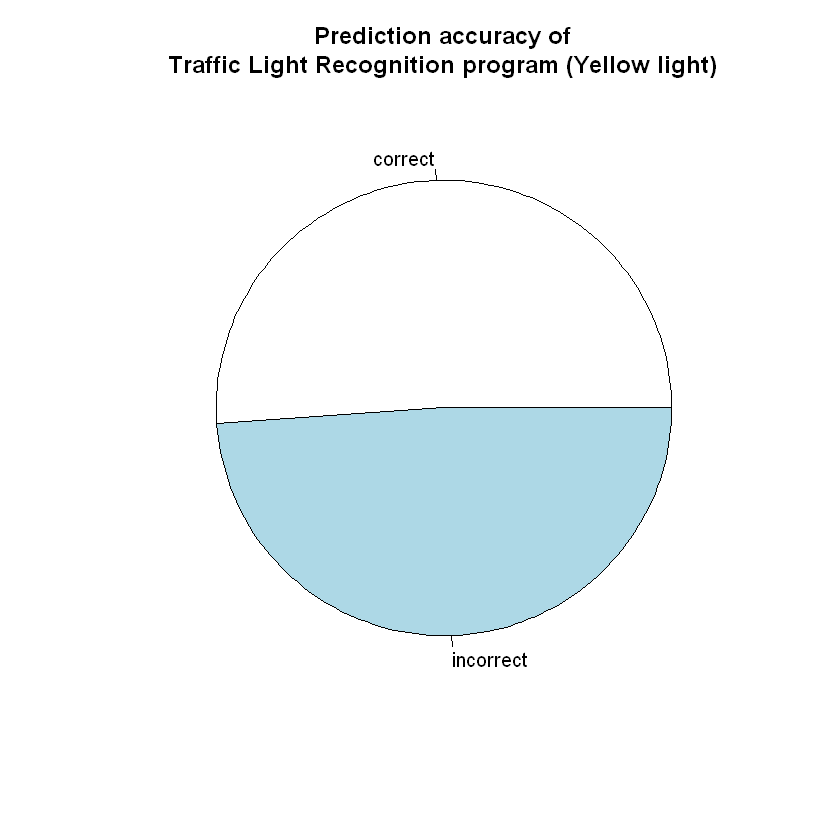

In [12]:
yellowLightdf <- filter(trafficLightdf, trafficLightdf$Yellow.actual == 1)
correctYellowLight <- filter(yellowLightdf, yellowLightdf$Green.detected == yellowLightdf$Green.actual & 
                            yellowLightdf$Yellow.detected == yellowLightdf$Yellow.actual &
                            yellowLightdf$Red.detected == yellowLightdf$Red.actual)
slices <- c(nrow(correctYellowLight),
nrow(yellowLightdf)-nrow(correctYellowLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Yellow light)")

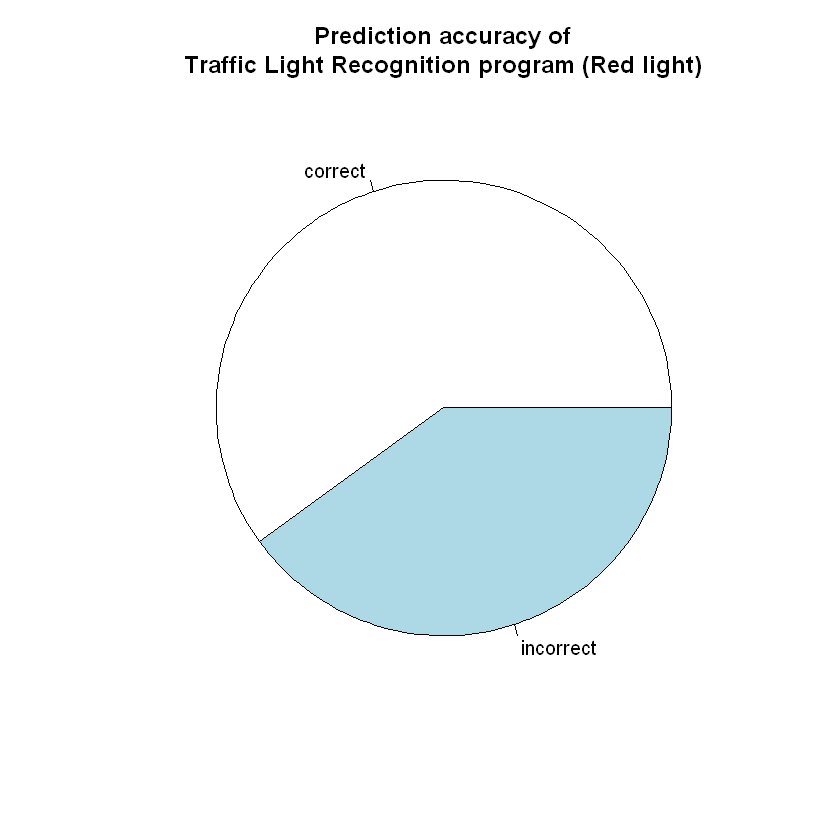

In [13]:
redLightdf <- filter(trafficLightdf, trafficLightdf$Red.actual == 1)
correctRedLight <- filter(redLightdf, redLightdf$Green.detected == redLightdf$Green.actual & 
                            redLightdf$Yellow.detected == redLightdf$Yellow.actual &
                            redLightdf$Red.detected == redLightdf$Red.actual)
slices <- c(nrow(correctRedLight),
nrow(redLightdf)-nrow(correctRedLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Red light)")

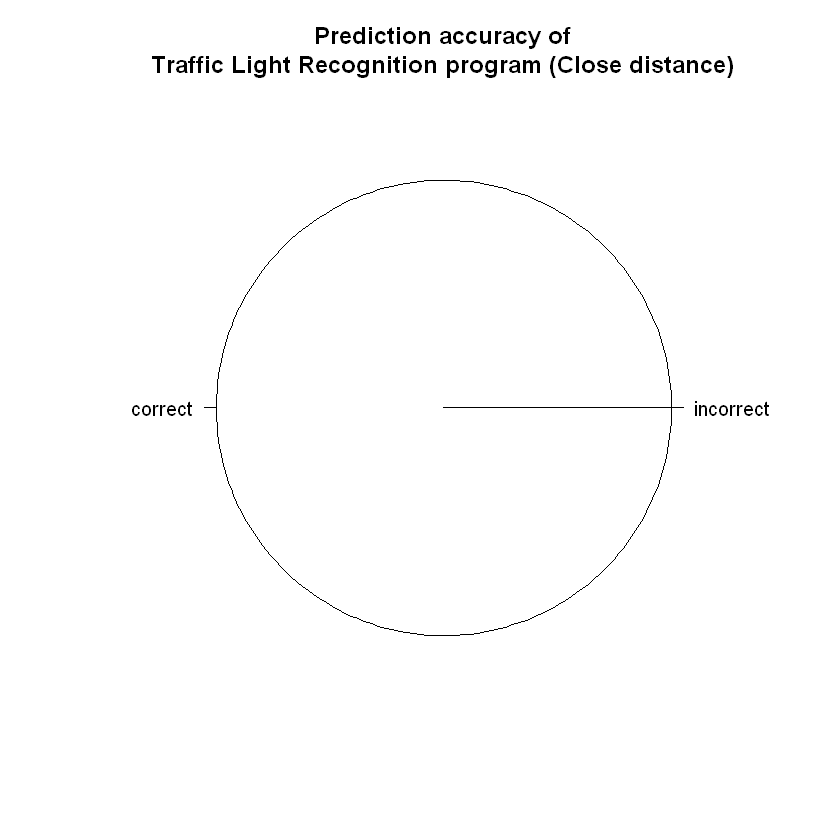

In [47]:
closeLightdf <- filter(resultsdf, resultsdf$Distance == "close")
correctCloseLight <- filter(closeLightdf, closeLightdf$Green.detected == closeLightdf$Green.actual & 
                            closeLightdf$Yellow.detected == closeLightdf$Yellow.actual &
                            closeLightdf$Red.detected == closeLightdf$Red.actual)
slices <- c(nrow(correctCloseLight),
nrow(closeLightdf)-nrow(correctCloseLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Close distance)")

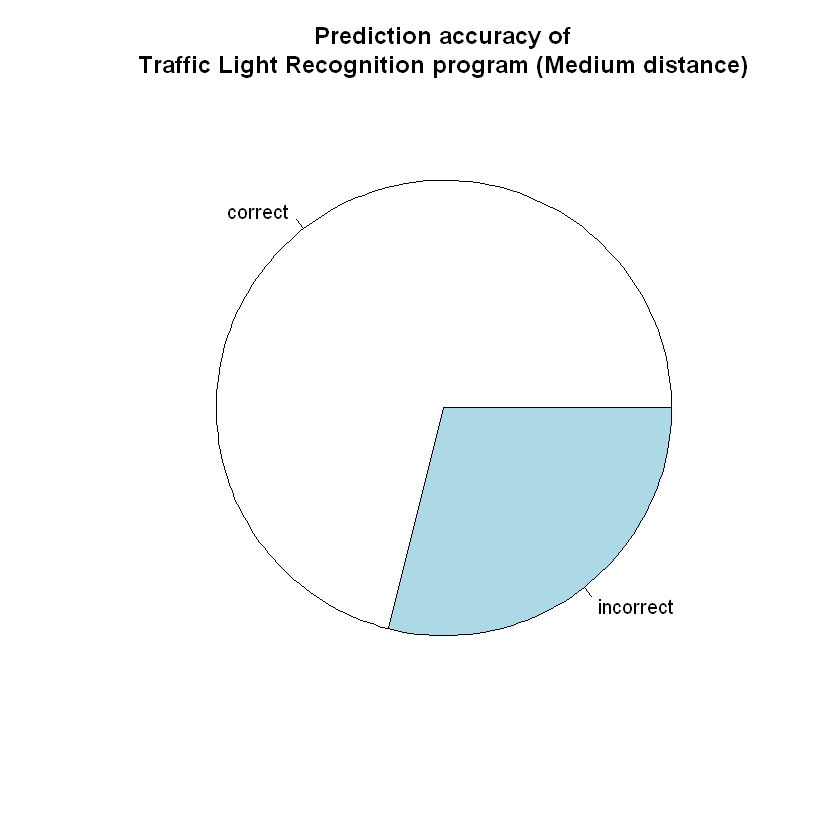

In [15]:
mediumLightdf <- filter(trafficLightdf, trafficLightdf$Distance == "medium")
correctMediumLight <- filter(mediumLightdf, mediumLightdf$Green.detected == mediumLightdf$Green.actual & 
                            mediumLightdf$Yellow.detected == mediumLightdf$Yellow.actual &
                            mediumLightdf$Red.detected == mediumLightdf$Red.actual)
slices <- c(nrow(correctMediumLight),
nrow(mediumLightdf)-nrow(correctMediumLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Medium distance)")

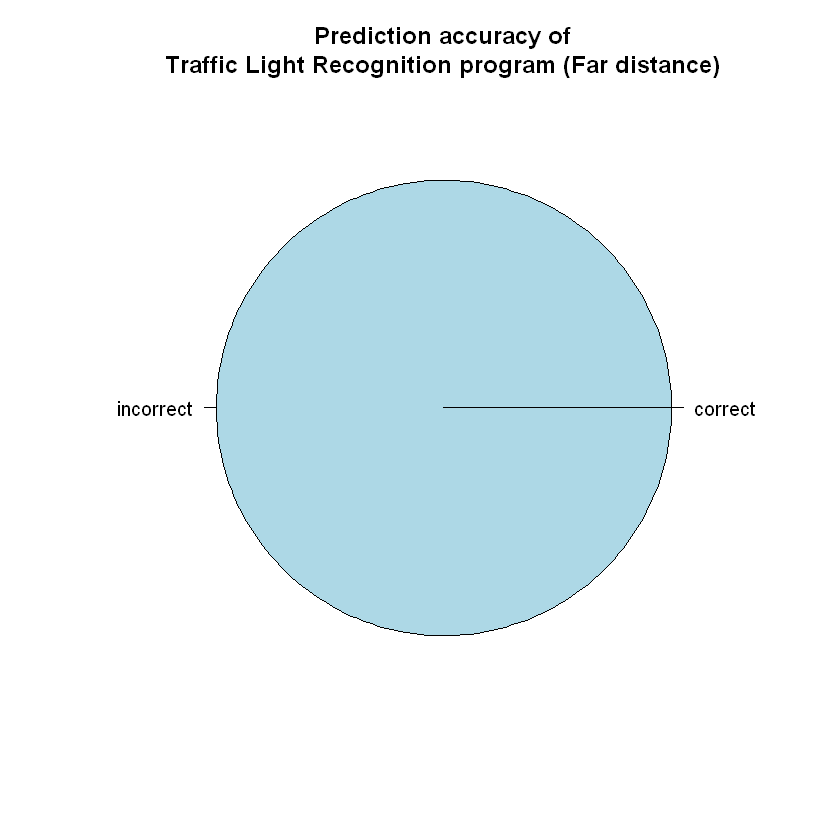

In [26]:
farLightdf <- filter(trafficLightdf, trafficLightdf$Distance == "far")
correctFarLight <- filter(farLightdf, farLightdf$Green.detected == farLightdf$Green.actual & 
                            farLightdf$Yellow.detected == farLightdf$Yellow.actual &
                            farLightdf$Red.detected == farLightdf$Red.actual)
slices <- c(nrow(correctFarLight),
nrow(farLightdf)-nrow(correctFarLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Traffic Light Recognition program (Far distance)")

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
GreenClose,0,2,0,1,0,0,None,close,1,0,0,None
GreenClose,0,4,0,1,0,0,None,close,1,0,0,None
GreenClose,0,6,0,1,0,0,None,close,1,0,0,None
GreenClose,0,8,0,1,0,0,None,close,1,0,0,None
GreenClose,0,10,0,1,0,0,None,close,1,0,0,None
GreenMedium,0,2,0,1,0,0,30,medium,1,0,0,None
GreenMedium,0,4,0,1,0,0,120,medium,1,0,0,None
GreenMedium,0,6,0,1,0,0,120,medium,1,0,0,None
GreenMedium,0,8,0,1,0,0,120,medium,1,0,0,None
GreenMedium,0,10,0,1,0,0,None,medium,1,0,0,None


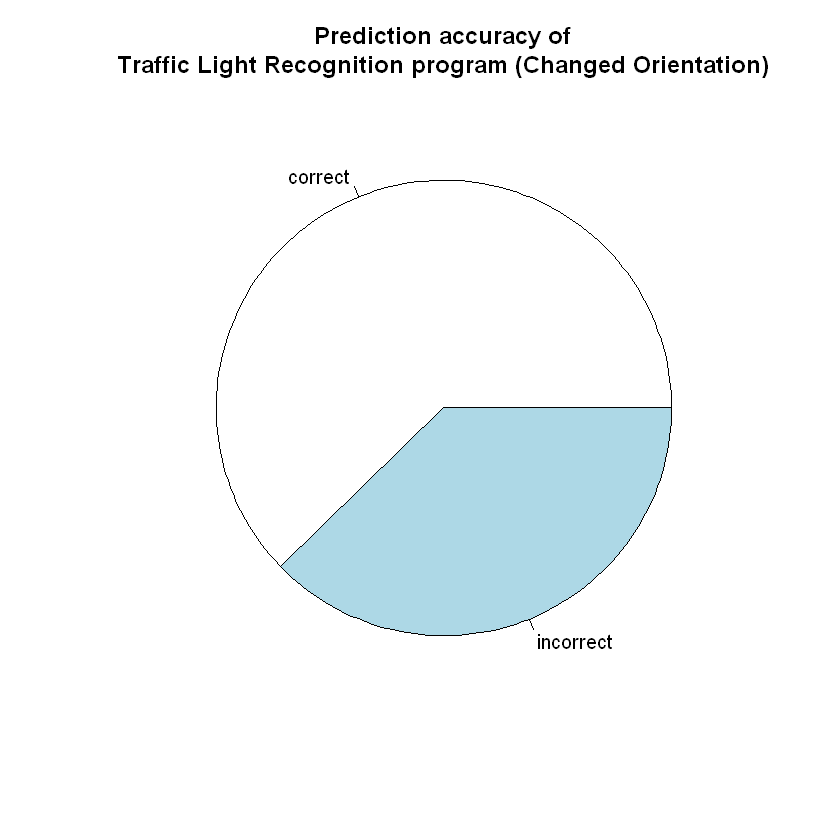

In [24]:
farLightdf <- filter(trafficLightdf, trafficLightdf$Orientation != 0)
correctFarLight <- filter(farLightdf, farLightdf$Green.detected == farLightdf$Green.actual & 
                            farLightdf$Yellow.detected == farLightdf$Yellow.actual &
                            farLightdf$Red.detected == farLightdf$Red.actual)
correctFarLight
slices <- c(nrow(correctFarLight),
nrow(farLightdf)-nrow(correctFarLight))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy ofspeedSigndf$correctSpeed <- ifelse(speedSigndf$Speed.detected == speedSigndf$Speed.actual, 1, 0)
speedSigndf
speedSigndf$correctSpeed
Traffic Light Recognition program (Changed Orientation)")

In [123]:
trafficLightdf$correctTraffic <- ifelse(trafficLightdf$Green.detected == trafficLightdf$Green.actual & 
                                        trafficLightdf$Yellow.detected == trafficLightdf$Yellow.actual & 
                                        trafficLightdf$Red.detected == trafficLightdf$Red.actual, 1, 0)
head(trafficLightdf,5)

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual,correctTraffic
GreenClose,0.00,0,0,1,0,0,None,close,1,0,0,None,1
GreenClose,0.05,0,0,1,0,0,None,close,1,0,0,None,1
GreenClose,0.10,0,0,1,0,0,None,close,1,0,0,None,1
GreenClose,0.15,0,0,1,0,0,None,close,1,0,0,None,1
GreenClose,0.20,0,0,1,0,0,None,close,1,0,0,None,1


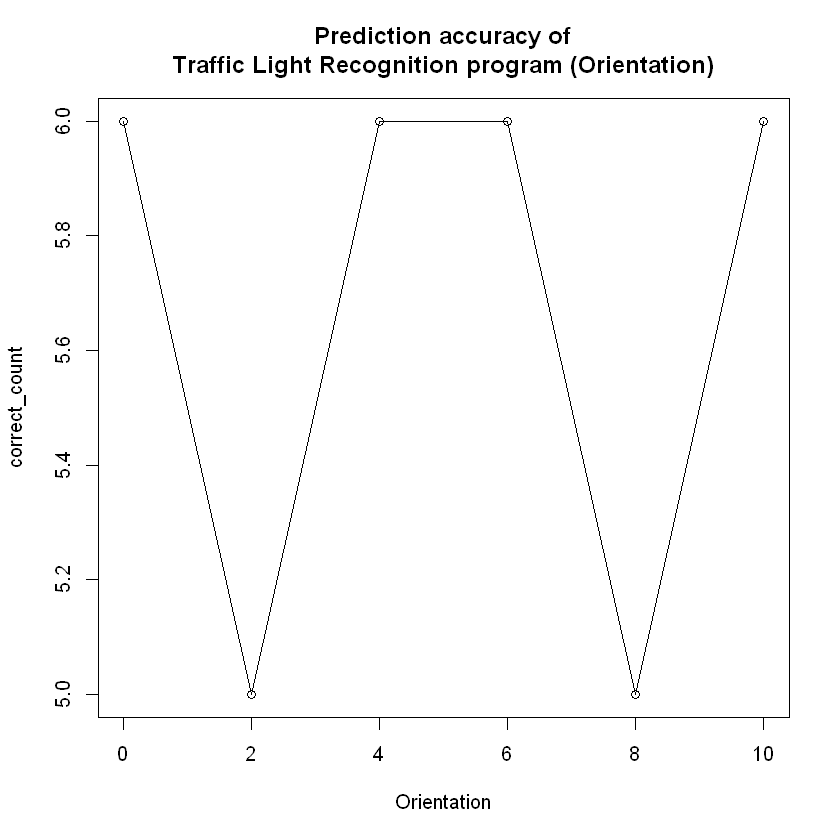

In [127]:
eachLightdf <- filter(trafficLightdf,trafficLightdf$Saturation == 0 & trafficLightdf$Salt.Pepper == 0)
test = eachLightdf  %>% select(correctTraffic, Orientation)  %>% group_by(Orientation) %>% summarise(correct_count = sum(correctTraffic)) 
plot(test,type = "o",
     main = "Prediction accuracy of
Traffic Light Recognition program (Orientation)")

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual
100close,0.00,0,0,0,0,0,100,close,0,0,0,100
100close,0.05,0,0,0,0,0,100,close,0,0,0,100
100close,0.10,0,0,0,0,0,100,close,0,0,0,100
100close,0.15,0,0,0,0,0,100,close,0,0,0,100
100close,0.20,0,0,0,0,0,100,close,0,0,0,100


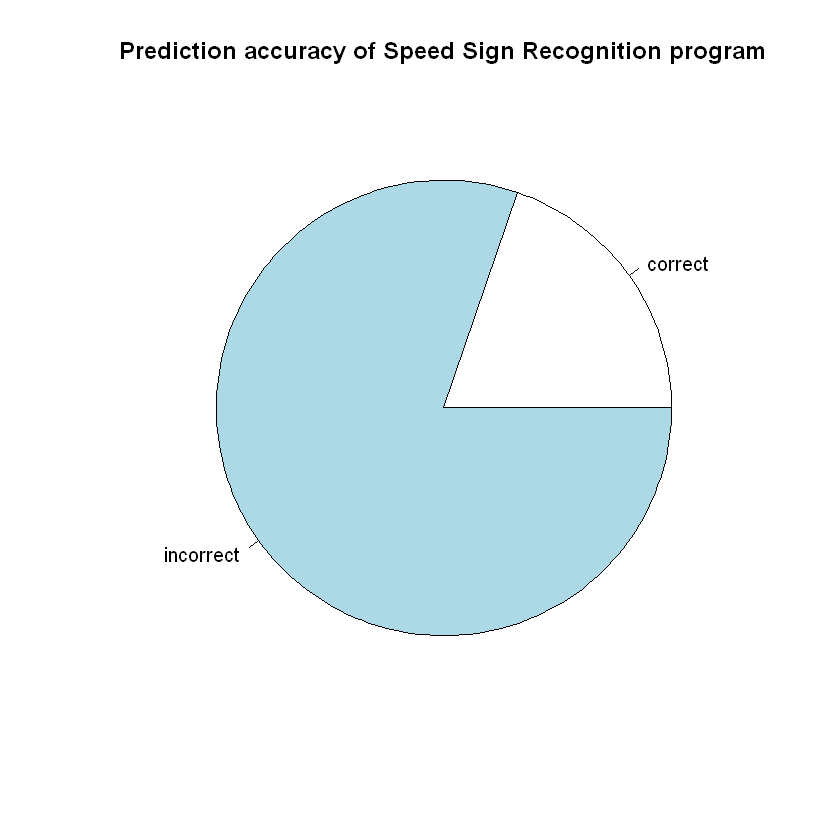

In [38]:
correctSpeedSigns <- filter(speedSigndf, speedSigndf$Speed.detected == speedSigndf$Speed.actual)
head(correctSpeedSigns,5)
slices <- c(nrow(correctSpeedSigns),
nrow(resultsdf)-nrow(correctSpeedSigns))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of Speed Sign Recognition program")

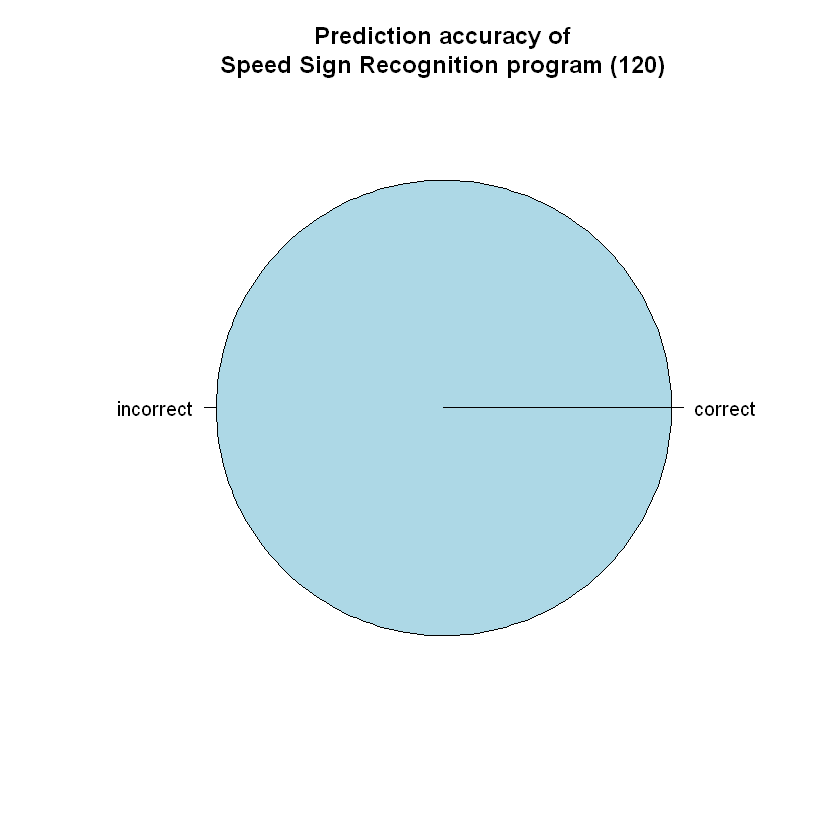

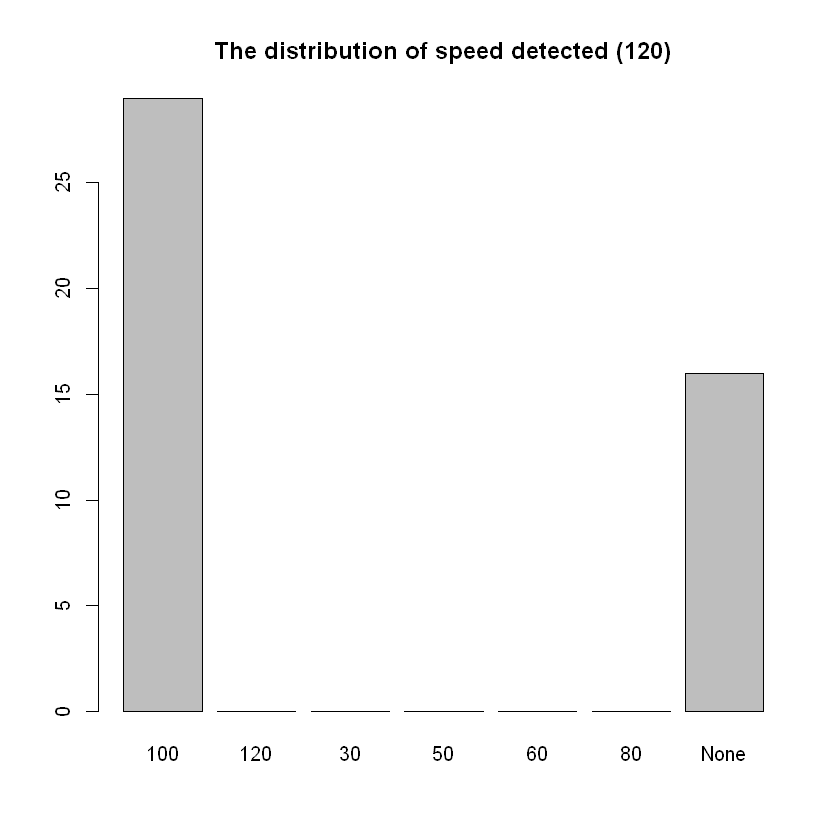

In [56]:
eachSpeeddf <- filter(speedSigndf, speedSigndf$Speed.actual == 120)
correctSpeed <- filter(eachSpeeddf, eachSpeeddf$Speed.detected == eachSpeeddf$Speed.actual)
slices <- c(nrow(correctSpeed),
nrow(eachSpeeddf)-nrow(correctSpeed))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Speed Sign Recognition program (120)")
plot(eachSpeeddf$Speed.detected,
    main = "The distribution of speed detected (120)")

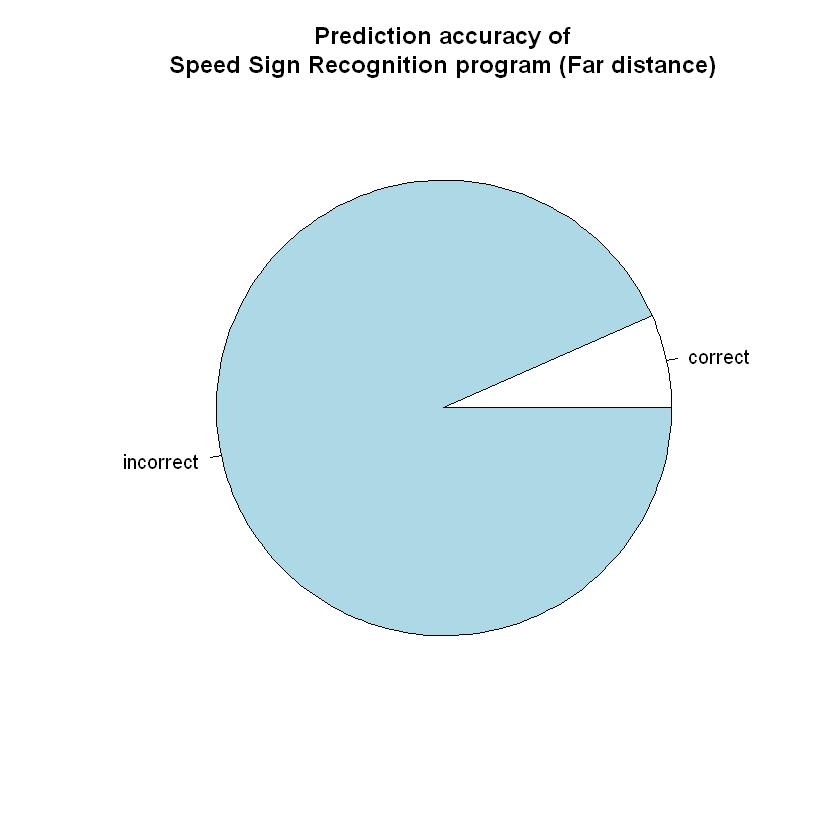

In [62]:
eachSpeeddf <- filter(speedSigndf, speedSigndf$Distance == "far")
correctSpeed <- filter(eachSpeeddf, eachSpeeddf$Speed.detected == eachSpeeddf$Speed.actual)
slices <- c(nrow(correctSpeed),
nrow(eachSpeeddf)-nrow(correctSpeed))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Speed Sign Recognition program (Far distance)")

In [ ]:
eachSpeeddf <- filter(speedSigndf, speedSigndf$Orientation == "close")
correctSpeed <- filter(eachSpeeddf, eachSpeeddf$Speed.detected == eachSpeeddf$Speed.actual)
slices <- c(nrow(correctSpeed),
nrow(eachSpeeddf)-nrow(correctSpeed))
lbls <- c("correct", "incorrect")
pie(slices, labels = lbls, main="Prediction accuracy of
Speed Sign Recognition program (Distance close)")


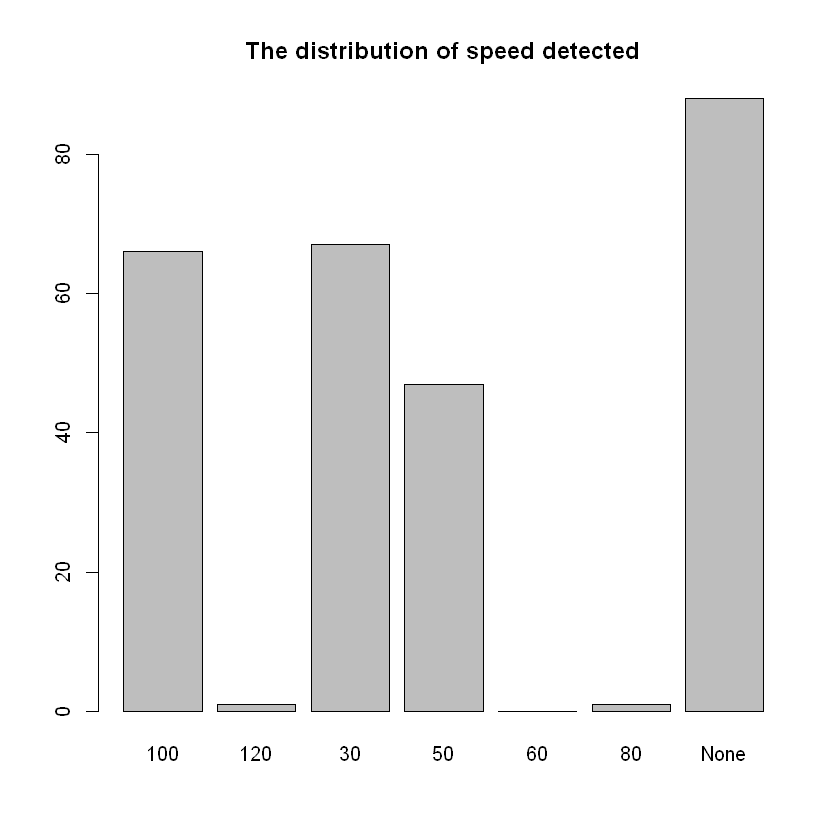

In [28]:
plot(speedSigndf$Speed.detected,
    main = "The distribution of speed detected")

In [77]:
speedSigndf$correctSpeed <- ifelse(speedSigndf$Speed.detected == speedSigndf$Speed.actual, 1, 0)
speedSigndf
speedSigndf$correctSpeed

Filename,Salt.Pepper,Orientation,Saturation,Green.detected,Yellow.detected,Red.detected,Speed.detected,Distance,Green.actual,Yellow.actual,Red.actual,Speed.actual,correctSpeed
100close,0.00,0,0,0,0,0,100,close,0,0,0,100,1
100close,0.05,0,0,0,0,0,100,close,0,0,0,100,1
100close,0.10,0,0,0,0,0,100,close,0,0,0,100,1
100close,0.15,0,0,0,0,0,100,close,0,0,0,100,1
100close,0.20,0,0,0,0,0,100,close,0,0,0,100,1
100close,0.00,0,5,0,0,0,100,close,0,0,0,100,1
100close,0.00,0,10,0,0,0,100,close,0,0,0,100,1
100close,0.00,0,15,0,0,0,100,close,0,0,0,100,1
100close,0.00,0,20,0,0,0,100,close,0,0,0,100,1
100close,0.00,0,25,0,0,0,100,close,0,0,0,100,1


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1
 [38] 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0

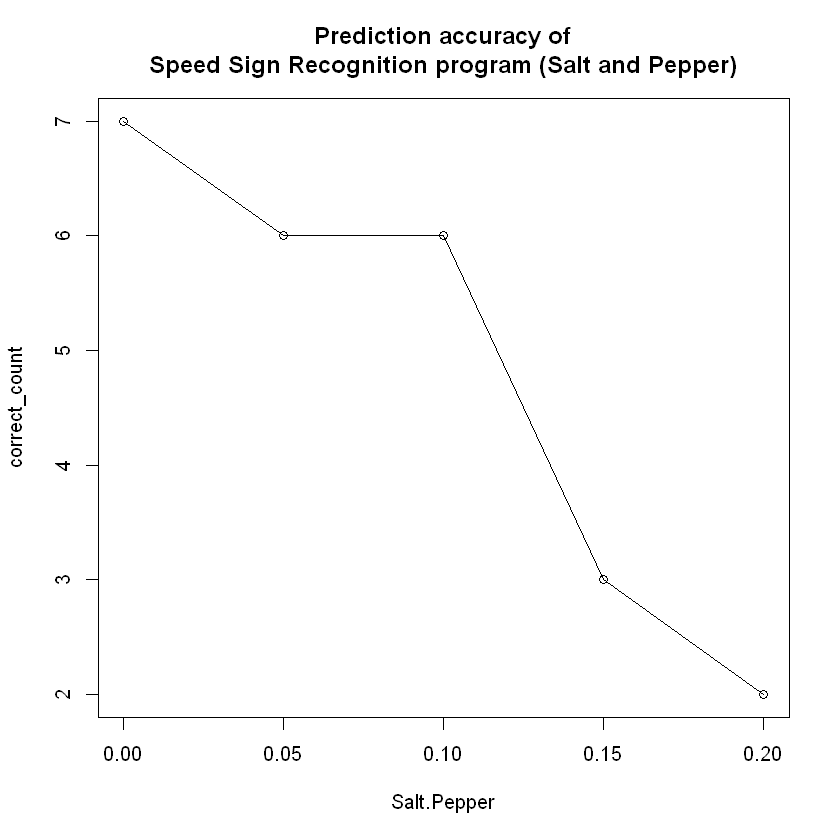

In [121]:
eachSpeeddf <- filter(speedSigndf,speedSigndf$Orientation == 0 & speedSigndf$Saturation == 0)
test = eachSpeeddf  %>% select(correctSpeed, Salt.Pepper)  %>% group_by(Salt.Pepper) %>% summarise(correct_count = sum(correctSpeed)) 
plot(test,type = "o",
     main = "Prediction accuracy of
Speed Sign Recognition program (Salt and Pepper)")

In [97]:
sum(speedSigndf$correctSpeed==1 & speedSigndf$Saturation==25)

[1] 7